## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [6]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [11]:
import os
import keras
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np

# 請嘗試設定 GPU：os.environ


In [12]:
train, test = keras.datasets.cifar10.load_data()

In [13]:
## 資料前處理
def preproc_x(x, flatten = True):
    if flatten == True:
        x = x.reshape((len(x), -1))
    #normalize to -1 & 1
    xmin = np.min(x)
    xmax = np.max(x)
    x = -1 + 2.0 * (x - xmin) / (xmax - xmin)
    return x

def preproc_y(y,num_classes = 10):
    y = keras.utils.to_categorical(y,num_classes)
    return y

In [14]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units = 10, num_neurons = [512,512,256,256,128,128]):
    
    input_layer = keras.layers.Input(input_shape)
    for i,n_units in enumerate(num_neurons):
        
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation = 'relu')(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, activation = 'relu')(x)
    
    output_layer = keras.layers.Dense(units = output_units, activation = 'softmax')(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    
    return model

In [17]:
model = build_mlp(x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dens

In [18]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [19]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [20]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 97s 2ms/step - loss: 1.6835 - acc: 0.3984 - val_loss: 1.5146 - val_acc: 0.4618
Epoch 2/100
50000/50000 [==============================] - 61s 1ms/step - loss: 1.4542 - acc: 0.4845 - val_loss: 1.4613 - val_acc: 0.4840
Epoch 3/100
50000/50000 [==============================] - 64s 1ms/step - loss: 1.3345 - acc: 0.5270 - val_loss: 1.3988 - val_acc: 0.5121
Epoch 4/100
50000/50000 [==============================] - 57s 1ms/step - loss: 1.2348 - acc: 0.5635 - val_loss: 1.3620 - val_acc: 0.5193
Epoch 5/100
50000/50000 [==============================] - 63s 1ms/step - loss: 1.1415 - acc: 0.5959 - val_loss: 1.3502 - val_acc: 0.5247
Epoch 6/100
50000/50000 [==============================] - 62s 1ms/step - loss: 1.0676 - acc: 0.6212 - val_loss: 1.3418 - val_acc: 0.5436
Epoch 7/100
50000/50000 [==============================] - 65s 1ms/step - 

50000/50000 [==============================] - 50s 1ms/step - loss: 0.0719 - acc: 0.9772 - val_loss: 3.3615 - val_acc: 0.5375
Epoch 58/100
50000/50000 [==============================] - 50s 997us/step - loss: 0.0978 - acc: 0.9683 - val_loss: 3.1313 - val_acc: 0.5407
Epoch 59/100
50000/50000 [==============================] - 52s 1ms/step - loss: 0.0725 - acc: 0.9770 - val_loss: 3.4280 - val_acc: 0.5286
Epoch 60/100
50000/50000 [==============================] - 50s 992us/step - loss: 0.0904 - acc: 0.9705 - val_loss: 3.2431 - val_acc: 0.5339
Epoch 61/100
50000/50000 [==============================] - 48s 969us/step - loss: 0.0816 - acc: 0.9725 - val_loss: 3.3018 - val_acc: 0.5395
Epoch 62/100
50000/50000 [==============================] - 49s 970us/step - loss: 0.0749 - acc: 0.9762 - val_loss: 3.4232 - val_acc: 0.5371
Epoch 63/100
50000/50000 [==============================] - 51s 1ms/step - loss: 0.0826 - acc: 0.9732 - val_loss: 3.2582 - val_acc: 0.5296
Epoch 64/100
50000/50000 [======

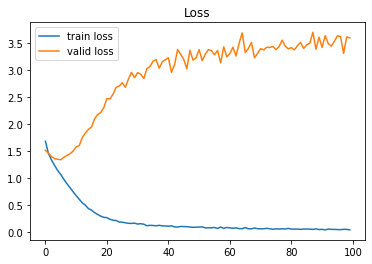

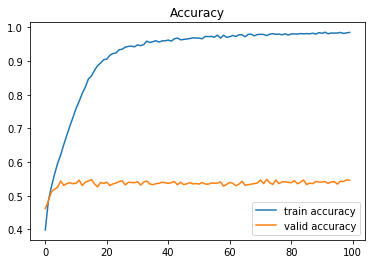

In [22]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()